In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03b_wn_620_720',
                          'P_50_T_250',
                          'min_5e-22_max_5e-17_ng_6',
                          'wgt_.6_.5_.4_.3_0_0',
                          'dgs',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'co2',
                               'band03b_wn_620_720',
                               'P_50_T_250',
                               'min_5e-22_max_5e-17_ng_6',
                               'wgt_.6_.5_.4_.3_0_0',
                               'dgs',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, ]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4, 5, 6,]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

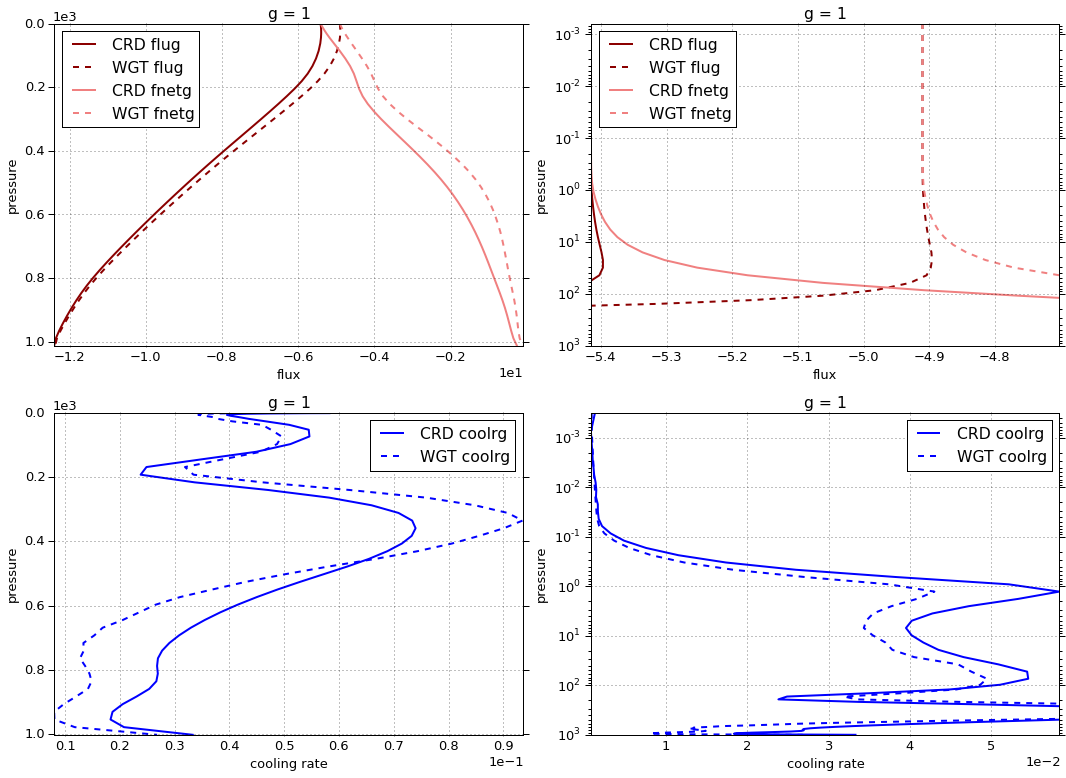

# Figure: flux, cooling rate. g-group 2

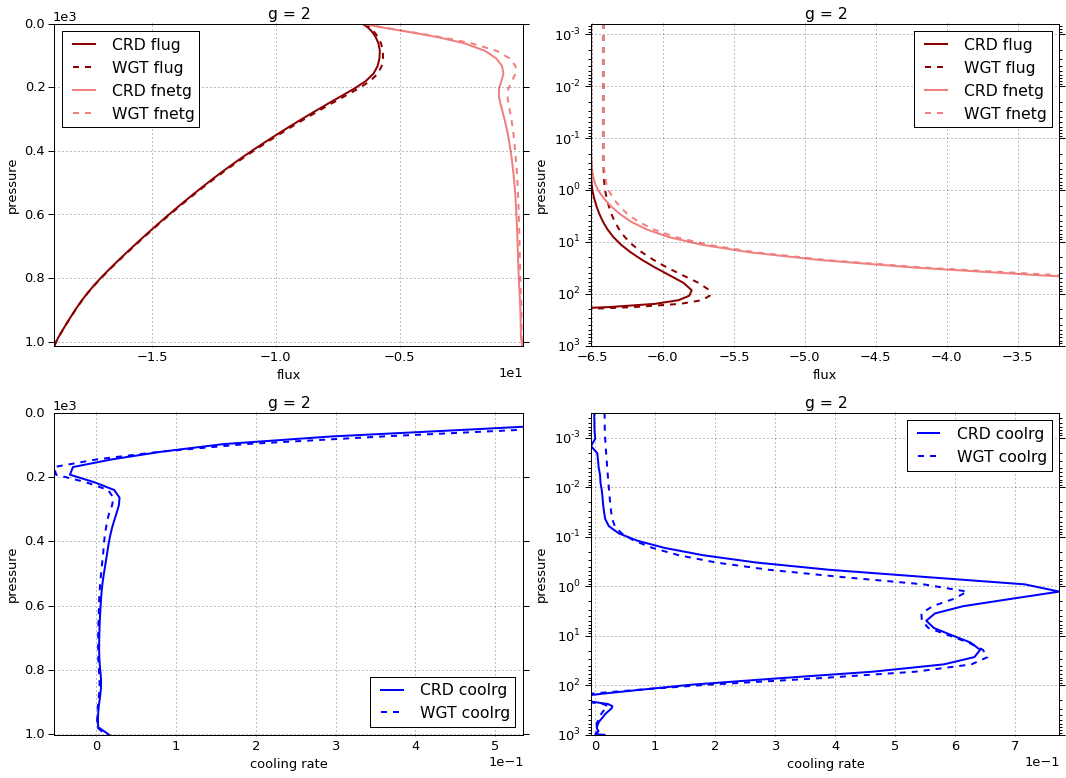

# Figure: flux, cooling rate. g-group 3

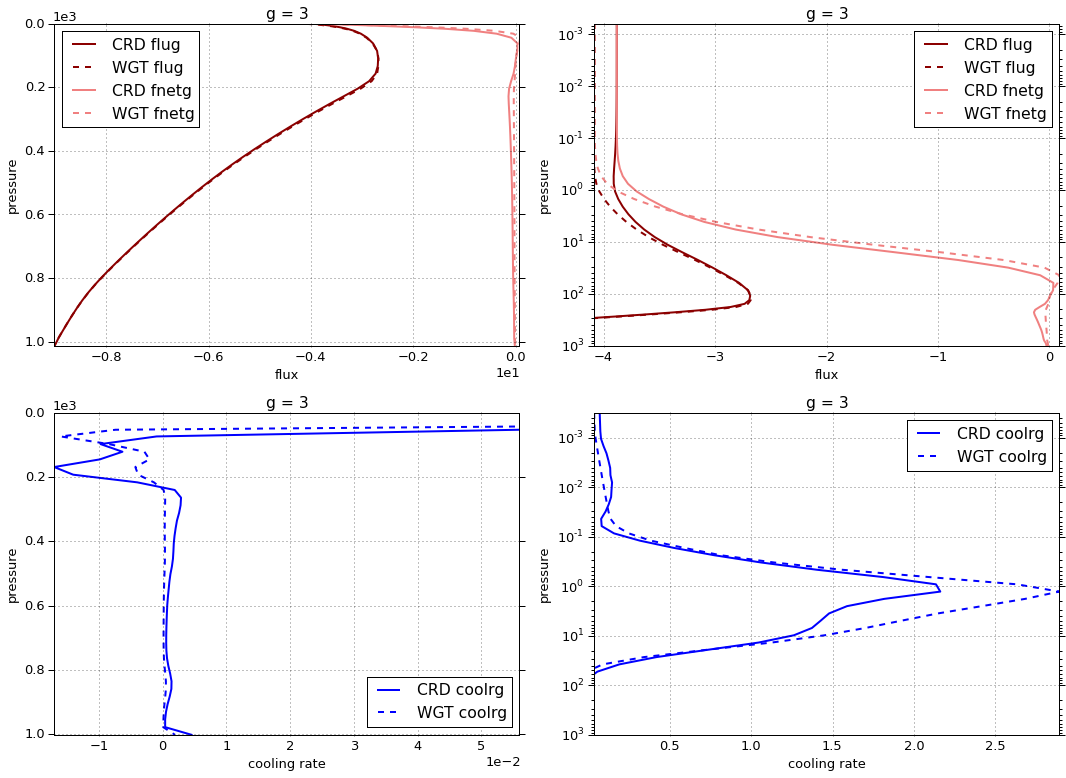

# Figure: flux, cooling rate. g-group 4

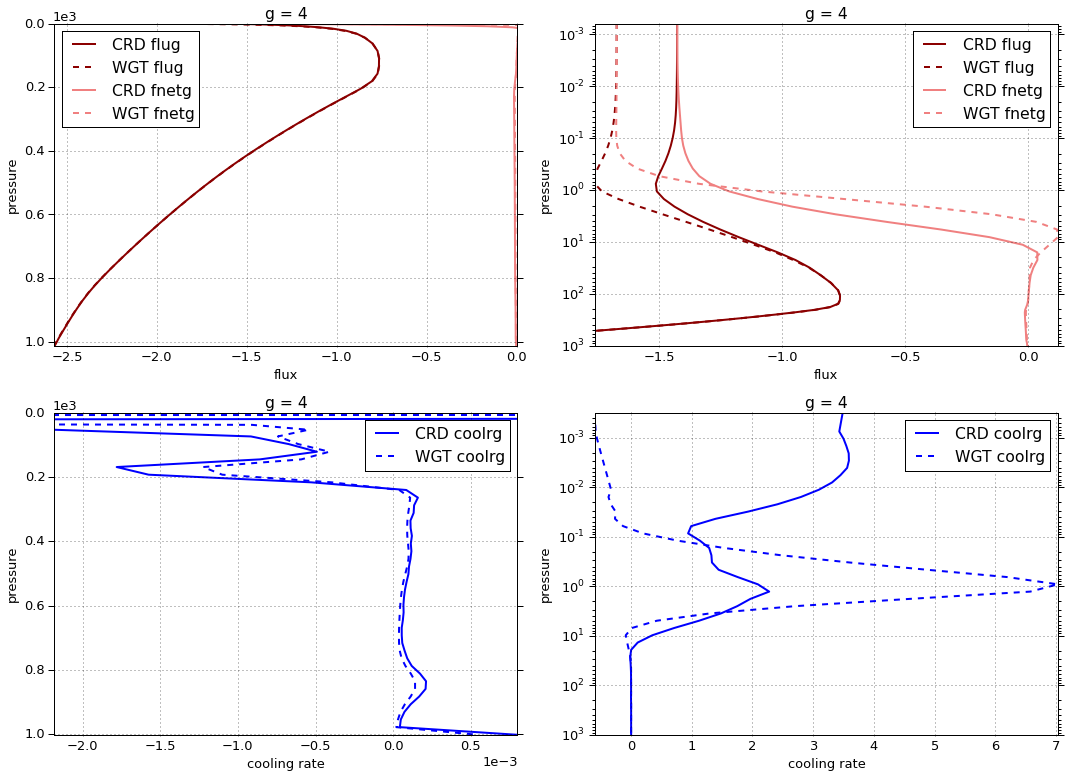

# Figure: flux, cooling rate. g-group 5

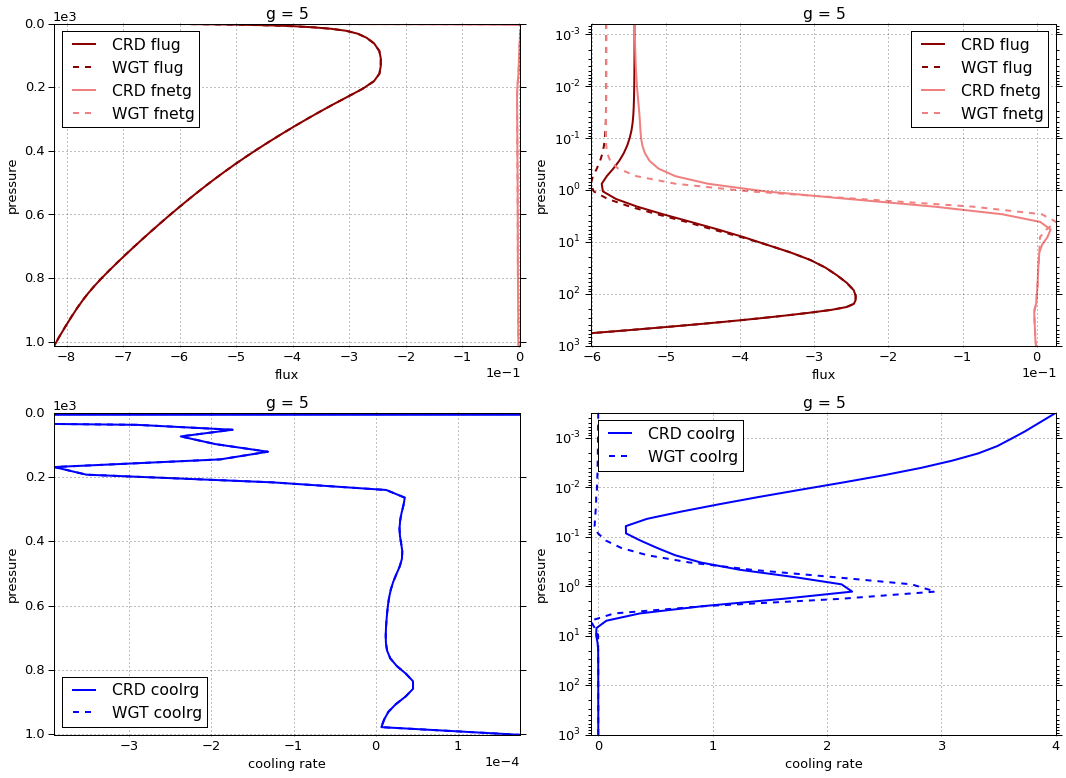

# Figure: flux, cooling rate. g-group 6

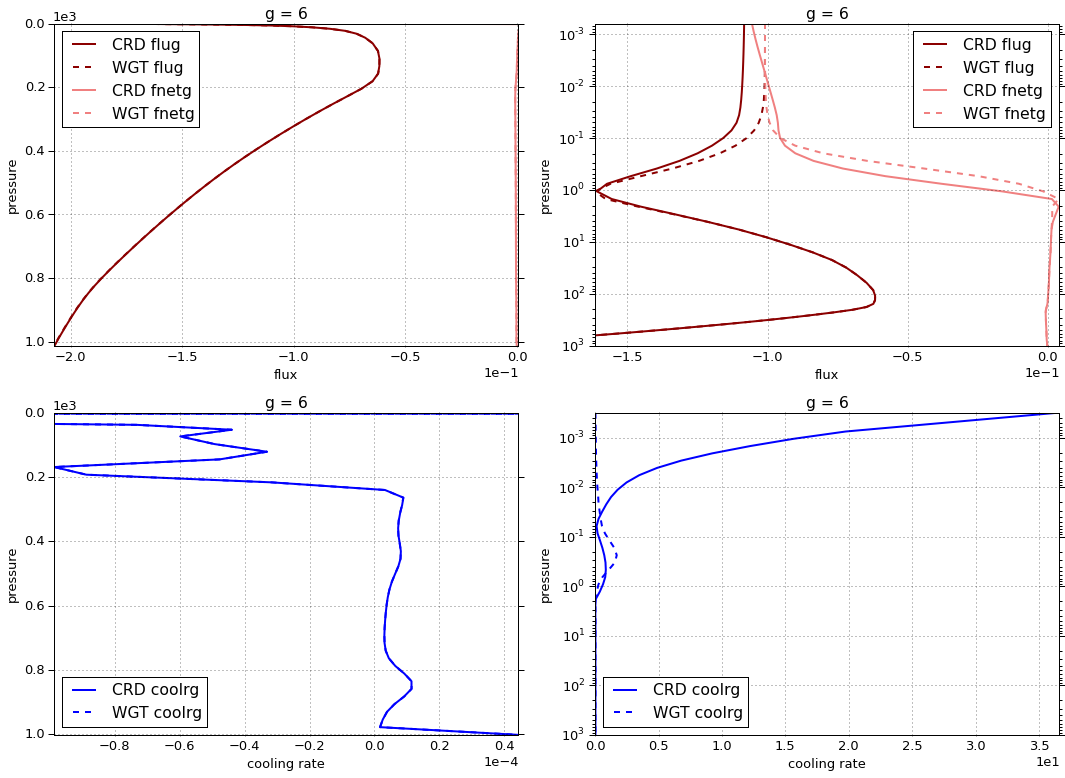

# Figure: flux, cooling rate. g-group total

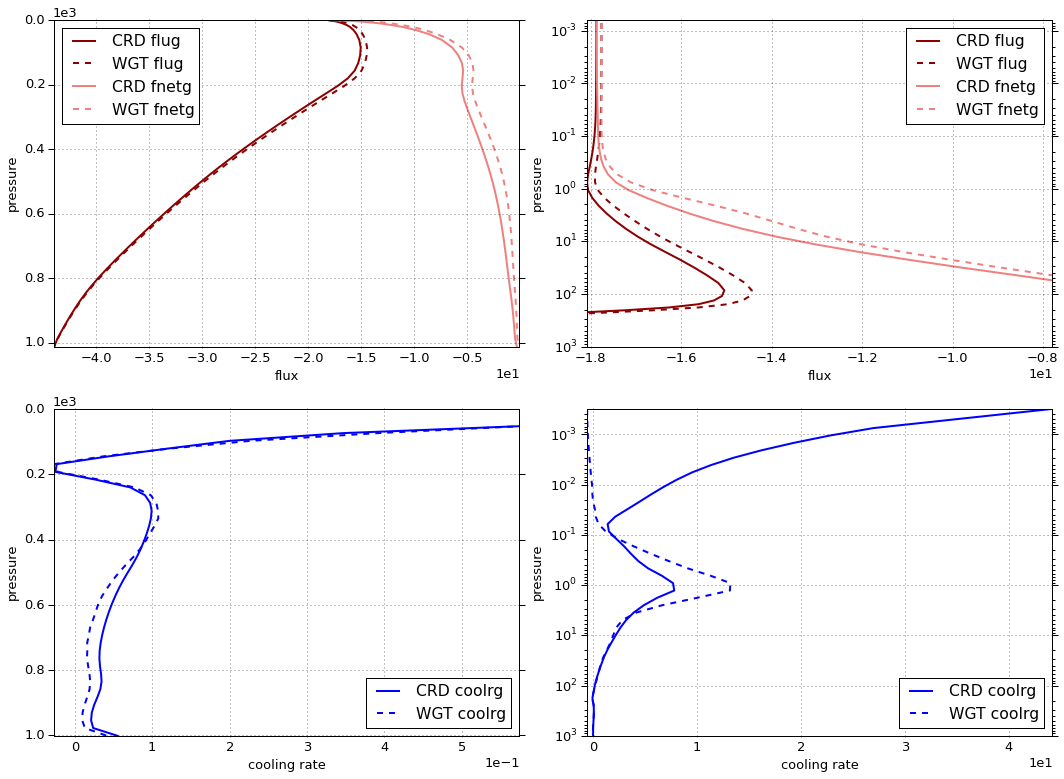

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [14]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg     fnetg
g pressure level                                
1 0        1      -5.415046   0.000000 -5.415046
  1013     76    -12.404846  12.146696 -0.258150
2 0        1      -6.507427   0.000000 -6.507427
  1013     76    -18.948919  18.899739 -0.049180
3 0        1      -3.884508   0.000000 -3.884508
  1013     76     -9.012677   8.999767 -0.012910
4 0        1      -1.426817   0.000000 -1.426817
  1013     76     -2.569321   2.567063 -0.002258
5 0        1      -0.542539   0.000000 -0.542539
  1013     76     -0.821838   0.821353 -0.000486
6 0        1      -0.108255   0.000000 -0.108255
  1013     76     -0.207246   0.207124 -0.000122


WGT


flug       fldg     fnetg
g pressure level                                
1 0        1      -4.910176   0.000000 -4.910176
  1013     76    -12.379002  12.267175 -0.111826
2 0        1      -6.420625   0.000000 -6.420625
  1013     76    -18.961458  18.929332 -0.032126
3 0        1      -4.084587   0.000000 -4.084587
  1013     76     -9.022526   9.017190 -0.005335
4 0        1      -1.672424   0.000000 -1.672424
  1013     76     -2.572366   2.570845 -0.001521
5 0        1      -0.580952   0.000000 -0.580952
  1013     76     -0.822080   0.821594 -0.000486
6 0        1      -0.100905   0.000000 -0.100905
  1013     76     -0.207415   0.207293 -0.000123


WGT - CRD


flug      fldg         fnetg
g pressure level                                  
1 0        1      0.504870  0.000000  5.048698e-01
  1013     76     0.025844  0.120479  1.463239e-01
2 0        1      0.086802  0.000000  8.680220e-02
  1013     76    -0.012539  0.029593  1.705421e-02
3 0        1     -0.200079  0.000000 -2.000791e-01
  1013     76    -0.009848  0.017423  7.574896e-03
4 0        1     -0.245607  0.000000 -2.456074e-01
  1013     76    -0.003045  0.003782  7.369208e-04
5 0        1     -0.038413  0.000000 -3.841297e-02
  1013     76    -0.000242  0.000241 -5.421400e-07
6 0        1      0.007350  0.000000  7.349670e-03
  1013     76    -0.000169  0.000169 -3.100300e-07

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer           
1 0.000312    1       0.001207
  1001.112500 75      0.033324
2 0.000312    1      -0.001066
  1001.112500 75      0.016096
3 0.000312    1       0.070455
  1001.112500 75      0.004521
4 0.000312    1       3.486125
  1001.112500 75      0.000803
5 0.000312    1       4.002666
  1001.112500 75      0.000175
6 0.000312    1      36.564108
  1001.112500 75      0.000044


WGT


coolrg
g pressure    layer          
1 0.000312    1      0.000792
  1001.112500 75     0.026823
2 0.000312    1      0.016154
  1001.112500 75     0.011702
3 0.000312    1      0.036302
  1001.112500 75     0.001923
4 0.000312    1     -0.601708
  1001.112500 75     0.000548
5 0.000312    1     -0.000387
  1001.112500 75     0.000175
6 0.000312    1      0.000277
  1001.112500 75     0.000044


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -4.147395e-04
  1001.112500 75    -6.500982e-03
2 0.000312    1      1.721988e-02
  1001.112500 75    -4.394514e-03
3 0.000312    1     -3.415331e-02
  1001.112500 75    -2.597929e-03
4 0.000312    1     -4.087833e+00
  1001.112500 75    -2.543649e-04
5 0.000312    1     -4.003053e+00
  1001.112500 75     1.925800e-07
6 0.000312    1     -3.656383e+01
  1001.112500 75     1.106790e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-17.884592,0.000000,-17.884592
1013,76,-43.964848,43.641742,-0.323107



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-17.769670,0.000000,-17.769670
1013,76,-43.964847,43.813429,-0.151417



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.149222e-01,0.000000,0.114922
1013,76,6.400000e-07,0.171687,0.171689


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,44.123495
1001.112500,75,0.054963



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.548570
1001.112500,75,0.041215



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-44.672065
1001.112500,75,-0.013747


In [15]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.28330,0.281566
2,0.43050,0.431287
3,0.20455,0.205221
4,0.05830,0.058510
5,0.01865,0.018699
6,0.00470,0.004718


In [16]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                          wgt                   \
              g level       flug          fldg     fnetg   g level       flug   
pressure                                                                        
0.000000      1     1  -5.415046  0.000000e+00 -5.415046   1     1  -4.910176   
0.000624      1     2  -5.415046  1.721527e-07 -5.415045   1     2  -4.910176   
0.000876      1     3  -5.415046  2.423198e-07 -5.415045   1     3  -4.910176   
0.001229      1     4  -5.415046  3.426286e-07 -5.415045   1     4  -4.910176   
0.001723      1     5  -5.415046  4.865807e-07 -5.415045   1     5  -4.910176   
0.002417      1     6  -5.415046  6.931822e-07 -5.415045   1     6  -4.910176   
0.003391      1     7  -5.415046  9.897686e-07 -5.415045   1     7  -4.910176   
0.004757      1     8  -5.415046  1.415614e-06 -5.415045   1     8  -4.910176   
0.006672      1     9  -5.415047  2.027148e-06 -5.415045   1     9  -4.910176   
0.009359      1    10  -5.415047  2.905628e-06 -5.415044   1    10  -4.910176   
0.013128      1    11  -5.415048  4.168077e-06 -5.415044   1    11  -4.910177   
0.018415      1    12  -5.415049  5.983361e-06 -5.415043   1    12  -4.910177   
0.025830      1    13  -5.415050  8.595577e-06 -5.415042   1    13  -4.910177   
0.036232      1    14  -5.415052  1.235922e-05 -5.415040   1    14  -4.910178   
0.050823      1    15  -5.415055  1.782304e-05 -5.415037   1    15  -4.910179   
0.071291      1    16  -5.415058  2.616911e-05 -5.415032   1    16  -4.910180   
0.100000      1    17  -5.415062  4.040300e-05 -5.415021   1    17  -4.910180   
0.140271      1    18  -5.415065  6.679900e-05 -5.414998   1    18  -4.910180   
0.196760      1    19  -5.415065  1.168887e-04 -5.414948   1    19  -4.910175   
0.275997      1    20  -5.415053  2.129133e-04 -5.414840   1    20  -4.910159   
0.387100      1    21  -5.415011  3.986810e-04 -5.414612   1    21  -4.910119   
0.543100      1    22  -5.414893  7.616892e-04 -5.414132   1    22  -4.910021   
0.761700      1    23  -5.414610  1.471219e-03 -5.413139   1    23  -4.909797   
1.068500      1    24  -5.414019  2.778233e-03 -5.411240   1    24  -4.909338   
1.498800      1    25  -5.413057  4.796258e-03 -5.408261   1    25  -4.908588   
2.102400      1    26  -5.411854  7.410805e-03 -5.404443   1    26  -4.907623   
2.949000      1    27  -5.410435  1.073547e-02 -5.399699   1    27  -4.906450   
4.136600      1    28  -5.408771  1.509441e-02 -5.393676   1    28  -4.905035   
5.802500      1    29  -5.406806  2.107451e-02 -5.385731   1    29  -4.903281   
8.139200      1    30  -5.404472  2.968833e-02 -5.374783   1    30  -4.901278   
...          ..   ...        ...           ...       ...  ..   ...        ...   
323.525000    1    47  -7.201306  3.576257e+00 -3.625048   1    47  -6.888636   
347.300000    1    48  -7.433681  4.015258e+00 -3.418423   1    48  -7.137711   
371.075000    1    49  -7.666380  4.456337e+00 -3.210044   1    49  -7.386361   
394.850000    1    50  -7.898210  4.894534e+00 -3.003676   1    50  -7.634018   
418.625000    1    51  -8.127966  5.325615e+00 -2.802351   1    51  -7.878279   
442.400000    1    52  -8.354790  5.746310e+00 -2.608480   1    52  -8.118479   
466.175000    1    53  -8.578250  6.154222e+00 -2.424028   1    53  -8.354535   
489.950000    1    54  -8.798347  6.547642e+00 -2.250705   1    54  -8.586279   
513.725000    1    55  -9.015356  6.925882e+00 -2.089473   1    55  -8.815031   
537.500000    1    56  -9.229540  7.289179e+00 -1.940361   1    56  -9.039768   
561.275000    1    57  -9.441089  7.638235e+00 -1.802854   1    57  -9.261111   
585.050000    1    58  -9.650081  7.973997e+00 -1.676084   1    58  -9.480152   
608.825000    1    59  -9.856497  8.297277e+00 -1.559219   1    59  -9.695812   
632.600000    1    60 -10.060274  8.609013e+00 -1.451261   1    60  -9.908756   
656.375000    1    61 -10.261284  8.910007e+00 -1.351277   1    61 -10.118806   
680.150000    1    62 -10.459334  9.200960e

In [17]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                       wgt                   \
              g level       flug       fldg     fnetg   g level       flug   
pressure                                                                     
0.000000      2     1  -6.507427   0.000000 -6.507427   2     1  -6.420625   
0.000624      2     2  -6.507431   0.000004 -6.507427   2     2  -6.420625   
0.000876      2     3  -6.507432   0.000005 -6.507427   2     3  -6.420626   
0.001229      2     4  -6.507435   0.000008 -6.507427   2     4  -6.420626   
0.001723      2     5  -6.507438   0.000011 -6.507427   2     5  -6.420627   
0.002417      2     6  -6.507443   0.000016 -6.507427   2     6  -6.420628   
0.003391      2     7  -6.507449   0.000022 -6.507427   2     7  -6.420628   
0.004757      2     8  -6.507457   0.000032 -6.507425   2     8  -6.420630   
0.006672      2     9  -6.507469   0.000045 -6.507423   2     9  -6.420632   
0.009359      2    10  -6.507486   0.000065 -6.507421   2    10  -6.420634   
0.013128      2    11  -6.507508   0.000093 -6.507415   2    11  -6.420638   
0.018415      2    12  -6.507541   0.000133 -6.507407   2    12  -6.420642   
0.025830      2    13  -6.507586   0.000191 -6.507395   2    13  -6.420648   
0.036232      2    14  -6.507650   0.000273 -6.507377   2    14  -6.420657   
0.050823      2    15  -6.507739   0.000392 -6.507347   2    15  -6.420668   
0.071291      2    16  -6.507863   0.000572 -6.507290   2    16  -6.420681   
0.100000      2    17  -6.508028   0.000873 -6.507155   2    17  -6.420687   
0.140271      2    18  -6.508232   0.001414 -6.506818   2    18  -6.420665   
0.196760      2    19  -6.508445   0.002405 -6.506039   2    19  -6.420564   
0.275997      2    20  -6.508575   0.004225 -6.504350   2    20  -6.420277   
0.387100      2    21  -6.508388   0.007569 -6.500819   2    21  -6.419571   
0.543100      2    22  -6.507321   0.013706 -6.493615   2    22  -6.417955   
0.761700      2    23  -6.504155   0.024822 -6.479333   2    23  -6.414443   
1.068500      2    24  -6.496982   0.043641 -6.453341   2    24  -6.407558   
1.498800      2    25  -6.484635   0.070700 -6.413934   2    25  -6.396449   
2.102400      2    26  -6.468456   0.104043 -6.364413   2    26  -6.381784   
2.949000      2    27  -6.448346   0.145437 -6.302910   2    27  -6.363391   
4.136600      2    28  -6.423261   0.199977 -6.223283   2    28  -6.339959   
5.802500      2    29  -6.391365   0.276947 -6.114418   2    29  -6.309324   
8.139200      2    30  -6.350008   0.391794 -5.958215   2    30  -6.269510   
...          ..   ...        ...        ...       ...  ..   ...        ...   
323.525000    2    47  -9.446286   8.755339 -0.690947   2    47  -9.348928   
347.300000    2    48  -9.934735   9.306787 -0.627948   2    48  -9.846116   
371.075000    2    49 -10.410979   9.838155 -0.572825   2    49 -10.330031   
394.850000    2    50 -10.874381  10.350219 -0.524162   2    50 -10.800361   
418.625000    2    51 -11.323822  10.843230 -0.480592   2    51 -11.255750   
442.400000    2    52 -11.758303  11.317016 -0.441288   2    52 -11.695873   
466.175000    2    53 -12.177601  11.771422 -0.406179   2    53 -12.120089   
489.950000    2    54 -12.582625  12.207267 -0.375359   2    54 -12.529553   
513.725000    2    55 -12.975442  12.626452 -0.348990   2    55 -12.926078   
537.500000    2    56 -13.357684  13.031095 -0.326589   2    56 -13.311751   
561.275000    2    57 -13.730790  13.423603 -0.307188   2    57 -13.688008   
585.050000    2    58 -14.095748  13.805640 -0.290107   2    58 -14.055872   
608.825000    2    59 -14.453240  14.178427 -0.274812   2    59 -14.415964   
632.600000    2    60 -14.803918  14.542803 -0.261115   2    60 -14.768987   
656.375000    2    61 -15.148037  14.899242 -0.248795   2    61 -15.115479   
680.150000    2    62 -15.485879  15.248359 -0.237520   2    62 -15.455424   
703.925000    2    63 -15.817604  15.590537 -0.227066   2    63 -15.789348   
727.700000    2    64 -16.143107  

In [18]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      3     1 -3.884508  0.000000 -3.884508   3     1 -4.084587   
0.000624      3     2 -3.884558  0.000054 -3.884503   3     2 -4.084606   
0.000876      3     3 -3.884577  0.000076 -3.884501   3     3 -4.084614   
0.001229      3     4 -3.884605  0.000108 -3.884498   3     4 -4.084625   
0.001723      3     5 -3.884644  0.000152 -3.884492   3     5 -4.084639   
0.002417      3     6 -3.884698  0.000215 -3.884483   3     6 -4.084659   
0.003391      3     7 -3.884772  0.000304 -3.884469   3     7 -4.084688   
0.004757      3     8 -3.884876  0.000430 -3.884447   3     8 -4.084727   
0.006672      3     9 -3.885023  0.000607 -3.884416   3     9 -4.084781   
0.009359      3    10 -3.885226  0.000857 -3.884369   3    10 -4.084857   
0.013128      3    11 -3.885513  0.001207 -3.884305   3    11 -4.084961   
0.018415      3    12 -3.885913  0.001696 -3.884217   3    12 -4.085107   
0.025830      3    13 -3.886480  0.002373 -3.884106   3    13 -4.085308   
0.036232      3    14 -3.887283  0.003308 -3.883975   3    14 -4.085589   
0.050823      3    15 -3.888431  0.004593 -3.883838   3    15 -4.085975   
0.071291      3    16 -3.890053  0.006416 -3.883637   3    16 -4.086491   
0.100000      3    17 -3.892297  0.009199 -3.883098   3    17 -4.087126   
0.140271      3    18 -3.895280  0.013697 -3.881584   3    18 -4.087802   
0.196760      3    19 -3.899086  0.021029 -3.878056   3    19 -4.088178   
0.275997      3    20 -3.903687  0.032893 -3.870794   3    20 -4.088083   
0.387100      3    21 -3.908685  0.051864 -3.856820   3    21 -4.086271   
0.543100      3    22 -3.912667  0.081813 -3.830854   3    22 -4.080805   
0.761700      3    23 -3.911890  0.127914 -3.783976   3    23 -4.067814   
1.068500      3    24 -3.900081  0.193707 -3.706375   3    24 -4.041571   
1.498800      3    25 -3.871551  0.275359 -3.596192   3    25 -3.998739   
2.102400      3    26 -3.831286  0.365032 -3.466253   3    26 -3.943806   
2.949000      3    27 -3.779972  0.473050 -3.306922   3    27 -3.877137   
4.136600      3    28 -3.716417  0.617526 -3.098890   3    28 -3.798819   
5.802500      3    29 -3.638285  0.821023 -2.817262   3    29 -3.706447   
8.139200      3    30 -3.542720  1.105660 -2.437060   3    30 -3.597615   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    3    47 -4.403498  4.294977 -0.108521   3    47 -4.365653   
347.300000    3    48 -4.644982  4.542757 -0.102225   3    48 -4.609915   
371.075000    3    49 -4.879382  4.782866 -0.096516   3    49 -4.846958   
394.850000    3    50 -5.106929  5.015631 -0.091298   3    50 -5.076811   
418.625000    3    51 -5.326986  5.240572 -0.086414   3    51 -5.299161   
442.400000    3    52 -5.539251  5.457568 -0.081682   3    52 -5.513562   
466.175000    3    53 -5.743427  5.666269 -0.077158   3    53 -5.719851   
489.950000    3    54 -5.940277  5.867181 -0.073097   3    54 -5.918467   
513.725000    3    55 -6.130586  6.060887 -0.069699   3    55 -6.110360   
537.500000    3    56 -6.315354  6.248603 -0.066751   3    56 -6.296578   
561.275000    3    57 -6.495377  6.431243 -0.064133   3    57 -6.477961   
585.050000    3    58 -6.671309  6.609466 -0.061843   3    58 -6.655096   
608.825000    3    59 -6.843456  6.783629 -0.059827   3    59 -6.828387   
632.600000    3    60 -7.012096  6.954130 -0.057966   3    60 -6.998118   
656.375000    3    61 -7.177437  7.121205 -0.056232   3    61 -7.164507   
680.150000    3    62 -7.339651  7.285048 -0.054604   3    62 -7.327735   
703.925000    3    63 -7.498845  7.445798 -0.053047   3    63 -7.487922   
727.700000    3    64 -7.655021  7.603515 -0.051507   3    64 -7.645093   
751.475000    3    65 -7.807964  7.758079 -0.049885   3    65 -7.799074   
775.250000    3    66 -7.956990  7.90

In [19]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      4     1 -1.426817  0.000000 -1.426817   4     1 -1.672424   
0.000624      4     2 -1.426930  0.000371 -1.426559   4     2 -1.672580   
0.000876      4     3 -1.426976  0.000519 -1.426457   4     3 -1.672643   
0.001229      4     4 -1.427039  0.000728 -1.426311   4     4 -1.672730   
0.001723      4     5 -1.427124  0.001021 -1.426103   4     5 -1.672853   
0.002417      4     6 -1.427241  0.001433 -1.425808   4     6 -1.673025   
0.003391      4     7 -1.427400  0.002006 -1.425394   4     7 -1.673267   
0.004757      4     8 -1.427617  0.002799 -1.424818   4     8 -1.673605   
0.006672      4     9 -1.427919  0.003883 -1.424036   4     9 -1.674078   
0.009359      4    10 -1.428334  0.005352 -1.422982   4    10 -1.674741   
0.013128      4    11 -1.428912  0.007312 -1.421600   4    11 -1.675671   
0.018415      4    12 -1.429728  0.009879 -1.419849   4    12 -1.677020   
0.025830      4    13 -1.430901  0.013170 -1.417731   4    13 -1.678906   
0.036232      4    14 -1.432634  0.017282 -1.415352   4    14 -1.681490   
0.050823      4    15 -1.435271  0.022320 -1.412951   4    15 -1.685194   
0.071291      4    16 -1.439249  0.028697 -1.410553   4    16 -1.690340   
0.100000      4    17 -1.444969  0.037609 -1.407360   4    17 -1.697433   
0.140271      4    18 -1.452615  0.050664 -1.401951   4    18 -1.707057   
0.196760      4    19 -1.462325  0.068979 -1.393347   4    19 -1.719352   
0.275997      4    20 -1.474309  0.093380 -1.380930   4    20 -1.734172   
0.387100      4    21 -1.488484  0.125085 -1.363399   4    21 -1.749996   
0.543100      4    22 -1.503422  0.166676 -1.336746   4    22 -1.762260   
0.761700      4    23 -1.513481  0.222187 -1.291294   4    23 -1.761499   
1.068500      4    24 -1.509265  0.293898 -1.215366   4    24 -1.732490   
1.498800      4    25 -1.480631  0.381213 -1.099418   4    25 -1.665177   
2.102400      4    26 -1.437496  0.478611 -0.958884   4    26 -1.579723   
2.949000      4    27 -1.383643  0.600125 -0.783518   4    27 -1.486142   
4.136600      4    28 -1.321083  0.745721 -0.575361   4    28 -1.390342   
5.802500      4    29 -1.251471  0.897156 -0.354315   4    29 -1.295621   
8.139200      4    30 -1.176517  1.018681 -0.157836   4    30 -1.203726   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    4    47 -1.246793  1.234289 -0.012504   4    47 -1.244669   
347.300000    4    48 -1.316316  1.304128 -0.012188   4    48 -1.314309   
371.075000    4    49 -1.383735  1.371868 -0.011868   4    49 -1.381892   
394.850000    4    50 -1.449121  1.437596 -0.011525   4    50 -1.447424   
418.625000    4    51 -1.512376  1.501174 -0.011202   4    51 -1.510817   
442.400000    4    52 -1.573351  1.562483 -0.010868   4    52 -1.571943   
466.175000    4    53 -1.632036  1.621485 -0.010551   4    53 -1.630758   
489.950000    4    54 -1.688512  1.678251 -0.010261   4    54 -1.687384   
513.725000    4    55 -1.743067  1.733086 -0.009982   4    55 -1.742093   
537.500000    4    56 -1.796006  1.786271 -0.009735   4    56 -1.795185   
561.275000    4    57 -1.847566  1.838049 -0.009518   4    57 -1.846898   
585.050000    4    58 -1.897914  1.888596 -0.009318   4    58 -1.897400   
608.825000    4    59 -1.947163  1.938034 -0.009129   4    59 -1.946806   
632.600000    4    60 -1.995387  1.986449 -0.008937   4    60 -1.995198   
656.375000    4    61 -2.042673  2.033915 -0.008758   4    61 -2.042636   
680.150000    4    62 -2.089057  2.080456 -0.008601   4    62 -2.089173   
703.925000    4    63 -2.134571  2.126128 -0.008443   4    63 -2.134843   
727.700000    4    64 -2.179220  2.170945 -0.008275   4    64 -2.179654   
751.475000    4    65 -2.222935  2.214869 -0.008065   4    65 -2.223554   
775.250000    4    66 -2.265579  2.25

In [20]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      5     1 -0.542539  0.000000 -0.542539   5     1 -0.580952   
0.000624      5     2 -0.542582  0.000339 -0.542243   5     2 -0.580952   
0.000876      5     3 -0.542598  0.000466 -0.542132   5     3 -0.580952   
0.001229      5     4 -0.542620  0.000640 -0.541981   5     4 -0.580952   
0.001723      5     5 -0.542650  0.000874 -0.541776   5     5 -0.580953   
0.002417      5     6 -0.542689  0.001185 -0.541503   5     6 -0.580954   
0.003391      5     7 -0.542739  0.001593 -0.541146   5     7 -0.580955   
0.004757      5     8 -0.542807  0.002117 -0.540690   5     8 -0.580958   
0.006672      5     9 -0.542895  0.002772 -0.540123   5     9 -0.580964   
0.009359      5    10 -0.543015  0.003574 -0.539442   5    10 -0.580975   
0.013128      5    11 -0.543179  0.004527 -0.538652   5    11 -0.580994   
0.018415      5    12 -0.543410  0.005636 -0.537775   5    12 -0.581032   
0.025830      5    13 -0.543749  0.006902 -0.536848   5    13 -0.581098   
0.036232      5    14 -0.544284  0.008332 -0.535952   5    14 -0.581222   
0.050823      5    15 -0.545190  0.009975 -0.535215   5    15 -0.581451   
0.071291      5    16 -0.546726  0.012095 -0.534631   5    16 -0.581883   
0.100000      5    17 -0.549135  0.015329 -0.533806   5    17 -0.582628   
0.140271      5    18 -0.552563  0.020525 -0.532038   5    18 -0.583886   
0.196760      5    19 -0.557185  0.028591 -0.528595   5    19 -0.585947   
0.275997      5    20 -0.563333  0.041045 -0.522288   5    20 -0.589087   
0.387100      5    21 -0.571148  0.060660 -0.510488   5    21 -0.593480   
0.543100      5    22 -0.580072  0.092436 -0.487637   5    22 -0.598604   
0.761700      5    23 -0.586893  0.143572 -0.443321   5    23 -0.601842   
1.068500      5    24 -0.585341  0.219302 -0.366039   5    24 -0.597695   
1.498800      5    25 -0.567456  0.314553 -0.252903   5    25 -0.578609   
2.102400      5    26 -0.538949  0.401120 -0.137829   5    26 -0.548706   
2.949000      5    27 -0.504107  0.457845 -0.046262   5    27 -0.512084   
4.136600      5    28 -0.466754  0.471582  0.004828   5    28 -0.472881   
5.802500      5    29 -0.429844  0.448773  0.018930   5    29 -0.436997   
8.139200      5    30 -0.395300  0.409906  0.014606   5    30 -0.398523   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    5    47 -0.397775  0.394966 -0.002809   5    47 -0.397773   
347.300000    5    48 -0.420031  0.417306 -0.002726   5    48 -0.420029   
371.075000    5    49 -0.441628  0.438984 -0.002644   5    49 -0.441627   
394.850000    5    50 -0.462568  0.460007 -0.002561   5    50 -0.462569   
418.625000    5    51 -0.482823  0.480349 -0.002474   5    51 -0.482829   
442.400000    5    52 -0.502353  0.499970 -0.002383   5    52 -0.502364   
466.175000    5    53 -0.521143  0.518850 -0.002293   5    53 -0.521159   
489.950000    5    54 -0.539233  0.537022 -0.002211   5    54 -0.539256   
513.725000    5    55 -0.556710  0.554570 -0.002140   5    55 -0.556740   
537.500000    5    56 -0.573669  0.571589 -0.002080   5    56 -0.573707   
561.275000    5    57 -0.590187  0.588159 -0.002028   5    57 -0.590234   
585.050000    5    58 -0.606318  0.604335 -0.001982   5    58 -0.606374   
608.825000    5    59 -0.622097  0.620157 -0.001940   5    59 -0.622163   
632.600000    5    60 -0.637552  0.635651 -0.001901   5    60 -0.637628   
656.375000    5    61 -0.652702  0.650838 -0.001864   5    61 -0.652788   
680.150000    5    62 -0.667564  0.665735 -0.001829   5    62 -0.667660   
703.925000    5    63 -0.682148  0.680353 -0.001795   5    63 -0.682256   
727.700000    5    64 -0.696457  0.694697 -0.001760   5    64 -0.696576   
751.475000    5    65 -0.710475  0.708754 -0.001721   5    65 -0.710606   
775.250000    5    66 -0.724147  0.72

In [21]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

crd                                     wgt                  \
              g level      flug      fldg     fnetg   g level      flug   
pressure                                                                  
0.000000      6     1 -0.108255  0.000000 -0.108255   6     1 -0.100905   
0.000624      6     2 -0.108349  0.002798 -0.105551   6     2 -0.100905   
0.000876      6     3 -0.108392  0.003430 -0.104962   6     3 -0.100907   
0.001229      6     4 -0.108447  0.004138 -0.104308   6     4 -0.100909   
0.001723      6     5 -0.108511  0.004919 -0.103593   6     5 -0.100913   
0.002417      6     6 -0.108586  0.005752 -0.102834   6     6 -0.100920   
0.003391      6     7 -0.108673  0.006619 -0.102053   6     7 -0.100932   
0.004757      6     8 -0.108771  0.007505 -0.101266   6     8 -0.100952   
0.006672      6     9 -0.108887  0.008406 -0.100481   6     9 -0.100986   
0.009359      6    10 -0.109024  0.009324 -0.099699   6    10 -0.101046   
0.013128      6    11 -0.109189  0.010272 -0.098918   6    11 -0.101147   
0.018415      6    12 -0.109401  0.011256 -0.098145   6    12 -0.101322   
0.025830      6    13 -0.109687  0.012294 -0.097394   6    13 -0.101650   
0.036232      6    14 -0.110148  0.013414 -0.096734   6    14 -0.102188   
0.050823      6    15 -0.111063  0.014751 -0.096312   6    15 -0.103142   
0.071291      6    16 -0.112865  0.016772 -0.096093   6    16 -0.104787   
0.100000      6    17 -0.115796  0.020274 -0.095522   6    17 -0.107448   
0.140271      6    18 -0.119813  0.026029 -0.093784   6    18 -0.111435   
0.196760      6    19 -0.124936  0.034830 -0.090106   6    19 -0.116997   
0.275997      6    20 -0.131435  0.047862 -0.083572   6    20 -0.124441   
0.387100      6    21 -0.139479  0.066348 -0.073131   6    21 -0.133937   
0.543100      6    22 -0.148786  0.090792 -0.057994   6    22 -0.145183   
0.761700      6    23 -0.157255  0.119325 -0.037929   6    23 -0.156008   
1.068500      6    24 -0.160841  0.144586 -0.016255   6    24 -0.161532   
1.498800      6    25 -0.155575  0.157009  0.001433   6    25 -0.157715   
2.102400      6    26 -0.145178  0.149018  0.003840   6    26 -0.146166   
2.949000      6    27 -0.133083  0.135883  0.002799   6    27 -0.133425   
4.136600      6    28 -0.121264  0.123029  0.001765   6    28 -0.121271   
5.802500      6    29 -0.110260  0.111554  0.001293   6    29 -0.110257   
8.139200      6    30 -0.100561  0.101710  0.001149   6    30 -0.100550   
...          ..   ...       ...       ...       ...  ..   ...       ...   
323.525000    6    47 -0.100372  0.099664 -0.000708   6    47 -0.100360   
347.300000    6    48 -0.105983  0.105296 -0.000687   6    48 -0.105976   
371.075000    6    49 -0.111428  0.110761 -0.000667   6    49 -0.111425   
394.850000    6    50 -0.116707  0.116061 -0.000646   6    50 -0.116709   
418.625000    6    51 -0.121813  0.121189 -0.000624   6    51 -0.121820   
442.400000    6    52 -0.126736  0.126135 -0.000601   6    52 -0.126749   
466.175000    6    53 -0.131472  0.130894 -0.000578   6    53 -0.131491   
489.950000    6    54 -0.136031  0.135474 -0.000557   6    54 -0.136057   
513.725000    6    55 -0.140436  0.139897 -0.000539   6    55 -0.140469   
537.500000    6    56 -0.144711  0.144186 -0.000524   6    56 -0.144750   
561.275000    6    57 -0.148874  0.148363 -0.000511   6    57 -0.148919   
585.050000    6    58 -0.152939  0.152439 -0.000500   6    58 -0.152991   
608.825000    6    59 -0.156916  0.156427 -0.000489   6    59 -0.156975   
632.600000    6    60 -0.160811  0.160331 -0.000479   6    60 -0.160877   
656.375000    6    61 -0.164628  0.164159 -0.000470   6    61 -0.164702   
680.150000    6    62 -0.168374  0.167913 -0.000461   6    62 -0.168455   
703.925000    6    63 -0.172049  0.171596 -0.000452   6    63 -0.172137   
727.700000    6    64 -0.175654  0.175211 -0.000443   6    64 -0.175750   
751.475000    6    65 -0.179187  0.178753 -0.000434   6    65 -0.179290   
775.250000    6    66 -0.182632  0.18

In [22]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')